In [3]:
# Import required libraries and dependencies
import pandas as pd
!pip install hvplot
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 27.1 MB/s eta 0:00:00


In [4]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "/content/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [11]:
# Create a DataFrame with the scaled data
scale.fit_transform(df_market_data)
df_market_data_scaled=pd.DataFrame(scale.fit_transform(df_market_data),columns=df_market_data.columns)
df_market_data_scaled.head()
# Copy the crypto names from the original data
df_market_data_scaled["crypto_names"]=df_market_data.index
# Set the coinid column as index
df_market_data_scaled.set_index("crypto_names",inplace=True)

# Display sample data
df_market_data_scaled.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
crypto_names,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


---

### Find the Best Value for k Using the Original Data.

In [12]:
# Create a list with the number of k-values from 1 to 11
k=list(range(1,12))

In [13]:
# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k

# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(df_market_data_scaled)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [19]:
# Create a dictionary with the data to plot the Elbow curve
{"k":k,"inertia":inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve=pd.DataFrame({"k":k,"inertia":inertia})

import matplotlib.pyplot as plt

<Axes: xlabel='k', ylabel='inertia'>

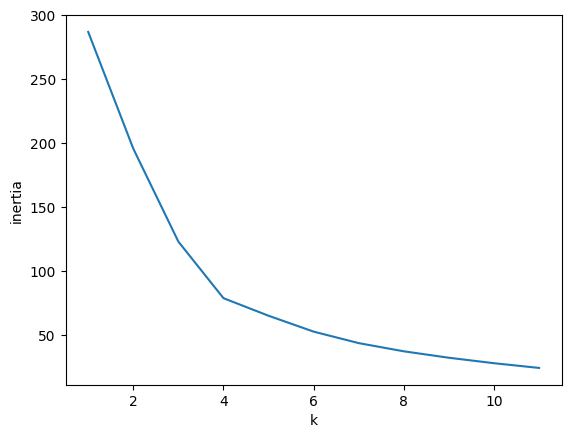

In [21]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
elbow_curve.hvplot.line(x="k",y="inertia",width=800,height=200)
import seaborn as sns
sns.lineplot(x="k",y="inertia",data=elbow_curve)

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** k=4 because there is the most substantial change in curvature at k=4.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [22]:
# Initialize the K-Means model using the best value for k
model=KMeans(n_clusters=4,random_state=1)

In [23]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [24]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters=model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
clusters

array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 1, 1],
      dtype=int32)

In [25]:
# Create a copy of the DataFrame
df_market_data_scaled_copy=df_market_data_scaled.copy()

In [27]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_scaled_copy["clusters"]=clusters

# Display sample data
df_market_data_scaled_copy.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
crypto_names,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,3
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,3
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,3
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,3


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

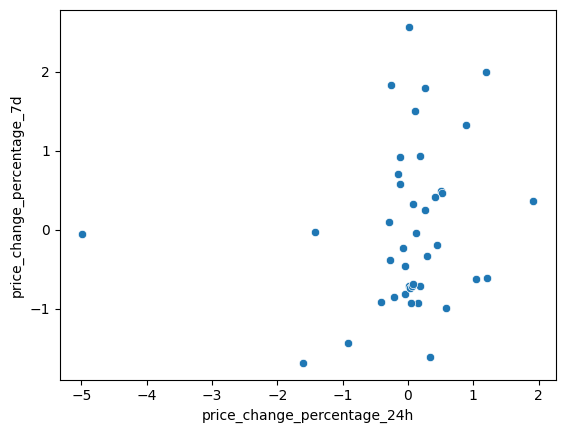

In [80]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
sns.scatterplot(x="price_change_percentage_24h",y="price_change_percentage_7d",data=df_market_data_scaled_copy)

---

### Optimize Clusters with Principal Component Analysis.

In [31]:
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)

In [45]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
components=pca.fit_transform(df_market_data_scaled)
# View the first five rows of the DataFrame.
df=pd.DataFrame(components,columns=["PC1","PC2","PC3"])
df.head()

,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [41]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_
0.3719856+0.34700813+0.17603793


0.89503166

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5 %

In [54]:
# Create a new DataFrame with the PCA data.
df_copy=df.copy()
# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
df_copy["crypto_names"]=df_market_data_scaled_copy.index

# Set the coinid column as index
df_copy.set_index("crypto_names",inplace=True)

# Display sample data
df_copy.head()

,PC1,PC2,PC3
crypto_names,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [ ]:
# Create a list with the number of k-values from 1 to 11
k=list(range(1,12))

In [55]:
# Create an empty list to store the inertia values
inertia=[]

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
  model=KMeans(n_clusters=i,random_state=1)
  model.fit_transform(df_copy)
  inertia.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [56]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve_dictionary={"k":k,"inertia":inertia}
# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_dictionary_dataframe=pd.DataFrame(elbow_curve_dictionary)

<Axes: xlabel='k', ylabel='inertia'>

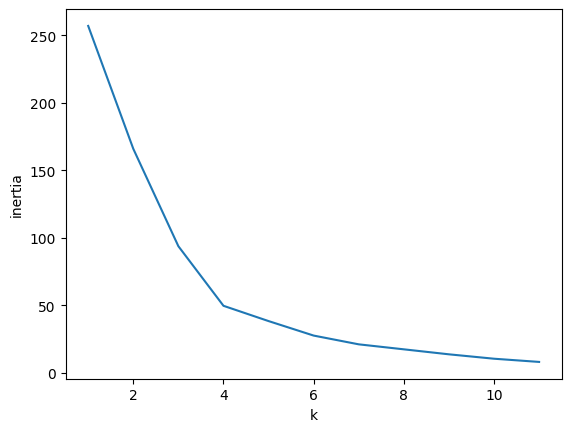

In [58]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
sns.lineplot(x="k",y="inertia",data=elbow_curve_dictionary_dataframe)

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** k=4

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it does not differ.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [59]:
# Initialize the K-Means model using the best value for k
model=KMeans(n_clusters=4,random_state=1)

In [60]:
# Fit the K-Means model using the PCA data
model.fit(df_copy)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [62]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters=model.predict(df_copy)
# Print the resulting array of cluster values.
clusters

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 3, 0, 0, 0, 0],
      dtype=int32)

In [64]:
# Create a copy of the DataFrame with the PCA data
df_copy_2=df_copy.copy()

# Add a new column to the DataFrame with the predicted clusters
df_copy_2["clusters"]=clusters

# Display sample data
df_copy_2.head()

,PC1,PC2,PC3,clusters
crypto_names,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


<Axes: xlabel='PC1', ylabel='PC2'>

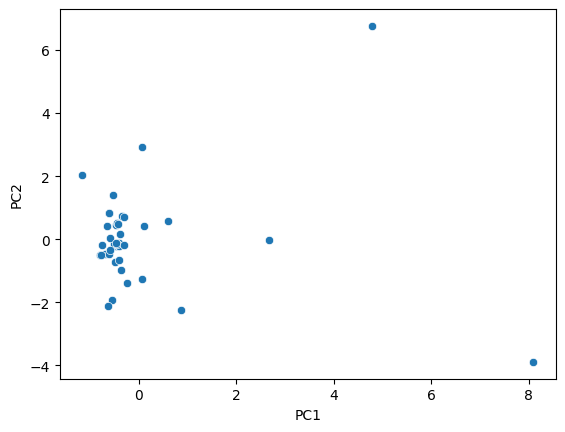

In [66]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
sns.scatterplot(x="PC1",y="PC2",data=df_copy_2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

<Axes: xlabel='k', ylabel='inertia'>

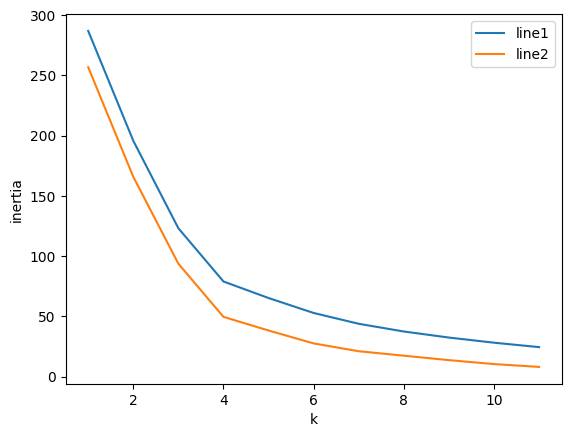

In [72]:
# Composite plot to contrast the Elbow curves
sns.lineplot(x="k",y="inertia",data=elbow_curve,label="line1")
sns.lineplot(x="k",y="inertia",data=elbow_curve_dictionary_dataframe,label="line2")

<Axes: xlabel='PC1', ylabel='PC2'>

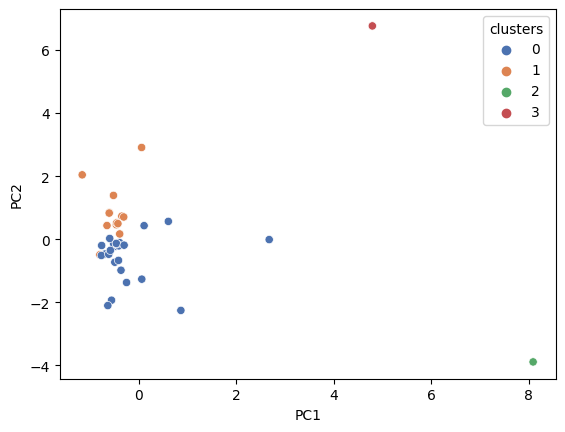

In [77]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
#sns.scatterplot(x="PC1",y="PC2",data=df_market_scaled_data_copy)
sns.scatterplot(x="PC1",y="PC2",data=df_copy_2, hue="clusters",palette="deep")


#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** There are ultimately two clear clusters, cluster=0, cluster=1.